In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.interpolate import RegularGridInterpolator
import random
import pandas as pd


In [2]:
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value

In [3]:
from astropy import constants as const
from astropy import units as u

In [4]:
import Merger_rate_plot as mr
import interpolate as inter

In [5]:
plt.style.use(['science'])
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [6]:
#df = pd.read_csv("data/Triple-mass-redshift.csv")
df_triples = pd.read_csv("data/Triple-mass-redshift.csv",index_col=False)
df_triples.head()

,M1,M2,M3,qin,qout,t_triple,z_triple,M1_ID,M2_ID,M3_ID
0,3.129984e+06,8.204738e+06,5.276829e+07,2.621335,4.655455,1.985633e+09,3.257459,9223372036854775807,9223372036854775807,9223372036720251904
1,1.546540e+08,4.211761e+07,3.132749e+08,0.272335,1.592074,5.529691e+09,1.101818,9223372036508590080,9223372036739678208,3402508881721836544
2,1.837358e+08,7.257406e+07,4.653945e+07,0.394991,0.181575,3.025313e+09,2.201414,9223372036649463808,9223372036820333568,9223372036854775807
3,8.736168e+07,2.386990e+07,2.216544e+06,0.273231,0.019927,1.972738e+09,3.276165,9223372036640331776,9223372036854775807,9223372036854775807
4,4.282838e+09,4.551391e+08,1.002870e+06,0.106270,0.000212,4.814316e+09,1.320180,9223372036798252032,9223372036854775807,9223372036854775807


In [7]:
df_binary = pd.read_csv("Data/binary-merger-data.csv",index_col= False)
df_binary.head()

,M1,M2,t_merger,Merger,Redshift,Type,BH1-ID,BH2-ID
0,2.261179e+06,1.629006e+06,8.587741e+08,Yes,6.459185,iso,9223372036326575607,9223372036365264250
1,1.614773e+06,1.077349e+06,8.934006e+08,Yes,6.265176,iso,9223372036330308081,9223372036383756962
2,6.554858e+06,1.175723e+06,4.120229e+09,Yes,1.587945,iso,9223372036306477048,9223372036351439102
3,7.039616e+06,6.263608e+06,8.933714e+10,No,0.000000,iso,9223372036312285311,9223372036346956171
4,1.179139e+07,3.306548e+06,1.421714e+10,No,0.000000,iso,9223372036300488336,9223372036365264250


In [8]:
z_iso_binary = df_binary["Redshift"]

In [9]:
merger_rate_iso_bin,lgzbins_iso_bin,dNdlogzdt_iso_bin = mr.merger_rate_log_plot(z_iso_binary,7,0.2,0.175,-3,1)

/Users/pranavsatheesh/miniconda3/envs/ast/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
merger_rate_iso_bin

0.21250571228832102

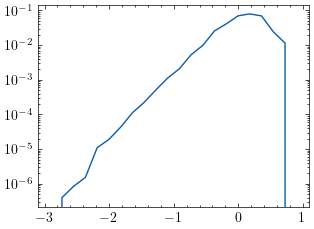

In [11]:
plt.plot(lgzbins_iso_bin,dNdlogzdt_iso_bin)
plt.yscale("log")

In [12]:
df = df_triples

In [13]:
#qin 
qin_Tr_counts_array = []
qin_Tr_ej_counts_array = []
qin_Tr_no_counts_array = []

#qout

qout_Tr_counts_array = []
qout_Tr_ej_counts_array = []
qout_Tr_no_counts_array = []

#M1
M1_Tr_counts_array = []
M1_Tr_ej_counts_array = []
M1_Tr_no_counts_array = []

#Redshift - merger (formation)
d2Ndlogzdt_Tr_array = []
d2Ndlogzdt_Tr_ej_array = []

mr_total_Tr = []
mr_total_Tr_ej = []

In [14]:
M1_12_array = []
M1_13_array = []
M1_23_array = []

qout_12_array = []
qout_13_array = []
qout_23_array=[]

qin_12_array = []
qin_13_array = []
qin_23_array=[]

In [48]:
def merger_rate_per_run(df_triples,zmax=4,zbinsize=0.01,lgzbinsize=0.2,lgzmin=-3.0,lgzmax=1.0):

    Tr_prompt = df[(df["flag"]=="Tr-12") | (df["flag"]=="Tr-13") | (df["flag"]=="Tr-23")]["z_triple"]
    Tr_prompt_mr,Tr_prompt_lgzbins,Tr_prompt_rate = mr.merger_rate_log_plot(Tr_prompt,zmax,zbinsize,lgzbinsize,lgzmin,lgzmax)

    mr_total_Tr.append(Tr_prompt_mr)
    d2Ndlogzdt_Tr_array.append(Tr_prompt_rate)

    Tr_ej_z = df[(df["flag"]=="Tr-ej")]["z_triple"]
    Tr_ej_mr,Tr_ej_lgzbins,Tr_ej_rate = mr.merger_rate_log_plot(Tr_ej_z,zmax,zbinsize,lgzbinsize,lgzmin,lgzmax) 

    mr_total_Tr_ej.append(Tr_ej_mr)
    d2Ndlogzdt_Tr_ej_array.append(Tr_ej_rate)

    # Tr_z = df[(df["flag"]=="Tr-ej")|(df["flag"]=="Tr-12") | (df["flag"]=="Tr-13") | (df["flag"]=="Tr-23")]["z"]
    # Tr_mr,Tr_lgzbins,Tr_rate = mr.merger_rate_log_plot(Tr_z,zmax,zbinsize,lgzbinsize,lgzmin,lgzmax)

    # mr_total.append(Tr_mr)
    # d2Ndlogzdt_array.append(Tr_rate)

    return Tr_prompt_lgzbins


In [49]:
def parameter_binning(df_triples,parameter_args,param_key):

    binsize = parameter_args[0]
    param_min = parameter_args[1]
    param_max = parameter_args[2]
    param_num = int((param_max-param_min)/binsize)

    p_Tr = df[(df["flag"]=="Tr-12") | (df["flag"]=="Tr-13") | (df["flag"]=="Tr-23")][param_key]
    p_Tr_ej = df[df["flag"]=="Tr-ej"][param_key]
    p_Tr_no = df[df["flag"]=="No"][param_key]

    p_Tr_count,p_Tr_bin_edges = np.histogram(np.log10(p_Tr),range=(param_min,param_max),bins=param_num)
    p_Tr_bins = p_Tr_bin_edges[:-1]+0.5*binsize

    p_Tr_ej_count,p_Tr_ej_bin_edges = np.histogram(np.log10(p_Tr_ej),range=(param_min,param_max),bins=param_num)
    p_Tr_ej_bins = p_Tr_ej_bin_edges[:-1]+0.5*binsize

    p_Tr_no_count,p_Tr_no_bin_edges = np.histogram(np.log10(p_Tr_no),range=(param_min,param_max),bins=param_num)
    p_Tr_no_bins = p_Tr_no_bin_edges[:-1]+0.5*binsize

    return p_Tr_bins,[p_Tr_count,p_Tr_ej_count,p_Tr_no_count]
    


In [50]:
def prompt_merger_binning(df_triples,parameter_args,param_key):

    binsize = parameter_args[0]
    param_min = parameter_args[1]
    param_max = parameter_args[2]
    param_num = int((param_max-param_min)/binsize)

    p_12 = df[df["flag"]=="Tr-12"][param_key]
    p_13 = df[df["flag"]=="Tr-13"][param_key]
    p_23 = df[df["flag"]=="Tr-23"][param_key]

    p_12_count,p_12_bin_edges = np.histogram(np.log10(p_12),range=(param_min,param_max),bins=param_num)
    p_12_bins = p_12_bin_edges[:-1]+0.5*binsize

    p_13_count,p_13_edges = np.histogram(np.log10(p_13),range=(param_min,param_max),bins=param_num)
    p_13_bins = p_13_edges[:-1]+0.5*binsize

    p_23_count,p_23_edges = np.histogram(np.log10(p_23),range=(param_min,param_max),bins=param_num)
    p_23_bins = p_23_edges[:-1]+0.5*binsize

    return p_12_bins,[p_12_count,p_13_count,p_23_count]
    

In [51]:
M1_ill = df["M1"].to_numpy()
qin_ill = df["qin"].to_numpy()
qout_ill = df["qout"].to_numpy()

In [52]:
N_triple = len(M1_ill)

In [53]:
df

,M1,M2,M3,qin,qout,t_triple,z_triple,M1_ID,M2_ID,M3_ID,flag
0,3.129984e+06,8.204738e+06,5.276829e+07,2.621335,4.655455,1.985633e+09,3.257459,9223372036854775807,9223372036854775807,9223372036720251904,No
1,1.546540e+08,4.211761e+07,3.132749e+08,0.272335,1.592074,5.529691e+09,1.101818,9223372036508590080,9223372036739678208,3402508881721836544,No
2,1.837358e+08,7.257406e+07,4.653945e+07,0.394991,0.181575,3.025313e+09,2.201414,9223372036649463808,9223372036820333568,9223372036854775807,No
3,8.736168e+07,2.386990e+07,2.216544e+06,0.273231,0.019927,1.972738e+09,3.276165,9223372036640331776,9223372036854775807,9223372036854775807,No
4,4.282838e+09,4.551391e+08,1.002870e+06,0.106270,0.000212,4.814316e+09,1.320180,9223372036798252032,9223372036854775807,9223372036854775807,No
...,...,...,...,...,...,...,...,...,...,...,...
526,1.585139e+07,1.019236e+08,6.895766e+07,6.429945,0.585503,1.241580e+10,0.103086,9223372036854775807,9223372036854775807,9223372036854775807,Tr-23
527,2.402718e+07,2.724291e+08,1.692168e+06,11.338373,0.005708,1.354208e+10,0.016267,9223372036854775807,9223372036854775807,9223372036854775807,No
528,1.352545e+07,2.158876e+07,6.823273e+06,1.596158,0.194317,1.311330e+10,0.048085,9223372036854775807,9223372036854775807,9223372036854775807,No
529,1.149681e+07,5.555056e+07,5.338969e+07,4.831823,0.796298,1.355722e+10,0.015170,9223372036854775807,9223372036854775807,9223372036854775807,Tr-ej


In [54]:

# M1_mergers = []
# M2_mergers = []
# M3_mergers = []
Tr = []
Tr_ej = []
No = []
Nruns = 100


for i in range(Nruns):
     merger_flags = []
     prompt_merger=0
     ejection_then_merger=0
     no_merger=0
     
     for j in range(N_triple):

        #random number draw
        P = random.uniform(0,1)
        a_P = inter.interp_result(M1_ill[j],qin_ill[j],qout_ill[j],"a")*0.01
        b_P = inter.interp_result(M1_ill[j],qin_ill[j],qout_ill[j],"b")*0.01
        c_P = inter.interp_result(M1_ill[j],qin_ill[j],qout_ill[j],"c")*0.01
        d_P = inter.interp_result(M1_ill[j],qin_ill[j],qout_ill[j],"d")*0.01

        if(P < a_P+b_P+c_P):
            prompt_merger = prompt_merger + 1
                
            if(P <= a_P):
            
                 merger_flags.append("Tr-12")
            
            elif(P > a_P and P <= a_P+b_P):
                
                merger_flags.append("Tr-13")
                    
            elif(P > a_P+b_P and P <= a_P+b_P+c_P):
                
                merger_flags.append("Tr-23")
                    
        elif(P > a_P+b_P+c_P and P <= a_P+b_P+c_P+d_P):
            
            #merger after ejection
            merger_flags.append("Tr-ej")
            ejection_then_merger = ejection_then_merger + 1

        elif(P > a_P + b_P + c_P + d_P):
            
            no_merger = no_merger + 1
            merger_flags.append("No")
        
     df["flag"] = merger_flags
     Tr.append(prompt_merger)
     Tr_ej.append(ejection_then_merger)
     No.append(no_merger)

     qin_x,qin_counts = parameter_binning(df,[0.4,-4,1],"qin")
     qin_Tr_counts_array.append(qin_counts[0])
     qin_Tr_ej_counts_array.append(qin_counts[1])
     qin_Tr_no_counts_array.append(qin_counts[2])

     qout_x,qout_counts = parameter_binning(df,[0.4,-4,1],"qout")
     qout_Tr_counts_array.append(qout_counts[0])
     qout_Tr_ej_counts_array.append(qout_counts[1])
     qout_Tr_no_counts_array.append(qout_counts[2])

     M1_x,M1_counts = parameter_binning(df,[0.6,5,12],"M1")
     M1_Tr_counts_array.append(M1_counts[0])
     M1_Tr_ej_counts_array.append(M1_counts[1])
     M1_Tr_no_counts_array.append(M1_counts[2])

     M1_p,M1_p_counts = prompt_merger_binning(df,[0.6,5,12],"M1")
     M1_12_array.append(M1_p_counts[0])
     M1_13_array.append(M1_p_counts[1])
     M1_23_array.append(M1_p_counts[2])

     qout_p,qout_p_counts = prompt_merger_binning(df,[0.4,-4,1],"qout")
     qout_12_array.append(qout_p_counts[0])
     qout_13_array.append(qout_p_counts[1])
     qout_23_array.append(qout_p_counts[2])

     qin_p,qin_p_counts = prompt_merger_binning(df,[0.4,-4,1],"qin")
     qin_12_array.append(qin_p_counts[0])
     qin_13_array.append(qin_p_counts[1])
     qin_23_array.append(qin_p_counts[2])

     lgz = merger_rate_per_run(df)

In [55]:
qin_Tr_counts_array = np.array(qin_Tr_counts_array)
qin_Tr_mu = np.mean(qin_Tr_counts_array,axis = 0)
qin_Tr_sigma = np.std(qin_Tr_counts_array,axis = 0)

qin_Tr_ej_counts_array = np.array(qin_Tr_ej_counts_array)
qin_Tr_ej_mu = np.mean(qin_Tr_ej_counts_array,axis = 0)
qin_Tr_ej_sigma = np.std(qin_Tr_ej_counts_array,axis = 0)

qin_Tr_no_counts_array = np.array(qin_Tr_no_counts_array)
qin_Tr_no_mu = np.mean(qin_Tr_no_counts_array,axis=0)
qin_Tr_no_sigma = np.std(qin_Tr_no_counts_array,axis=0)

In [56]:
qout_Tr_counts_array = np.array(qout_Tr_counts_array)
qout_Tr_mu = np.mean(qout_Tr_counts_array,axis = 0)
qout_Tr_sigma = np.std(qout_Tr_counts_array,axis = 0)

qout_Tr_ej_counts_array = np.array(qout_Tr_ej_counts_array)
qout_Tr_ej_mu = np.mean(qout_Tr_ej_counts_array,axis = 0)
qout_Tr_ej_sigma = np.std(qout_Tr_ej_counts_array,axis = 0)

qout_Tr_no_counts_array = np.array(qout_Tr_no_counts_array)
qout_Tr_no_mu = np.mean(qout_Tr_no_counts_array,axis=0)
qout_Tr_no_sigma = np.std(qout_Tr_no_counts_array,axis=0)

In [57]:
M1_Tr_counts_array = np.array(M1_Tr_counts_array)
M1_Tr_mu = np.mean(M1_Tr_counts_array,axis = 0)
M1_Tr_sigma = np.std(M1_Tr_counts_array,axis = 0)

M1_Tr_ej_counts_array = np.array(M1_Tr_ej_counts_array)
M1_Tr_ej_mu = np.mean(M1_Tr_ej_counts_array,axis = 0)
M1_Tr_ej_sigma = np.std(M1_Tr_ej_counts_array,axis = 0)

M1_Tr_no_counts_array = np.array(M1_Tr_no_counts_array)
M1_Tr_no_mu = np.mean(M1_Tr_no_counts_array,axis=0)
M1_Tr_no_sigma = np.std(M1_Tr_no_counts_array,axis=0)

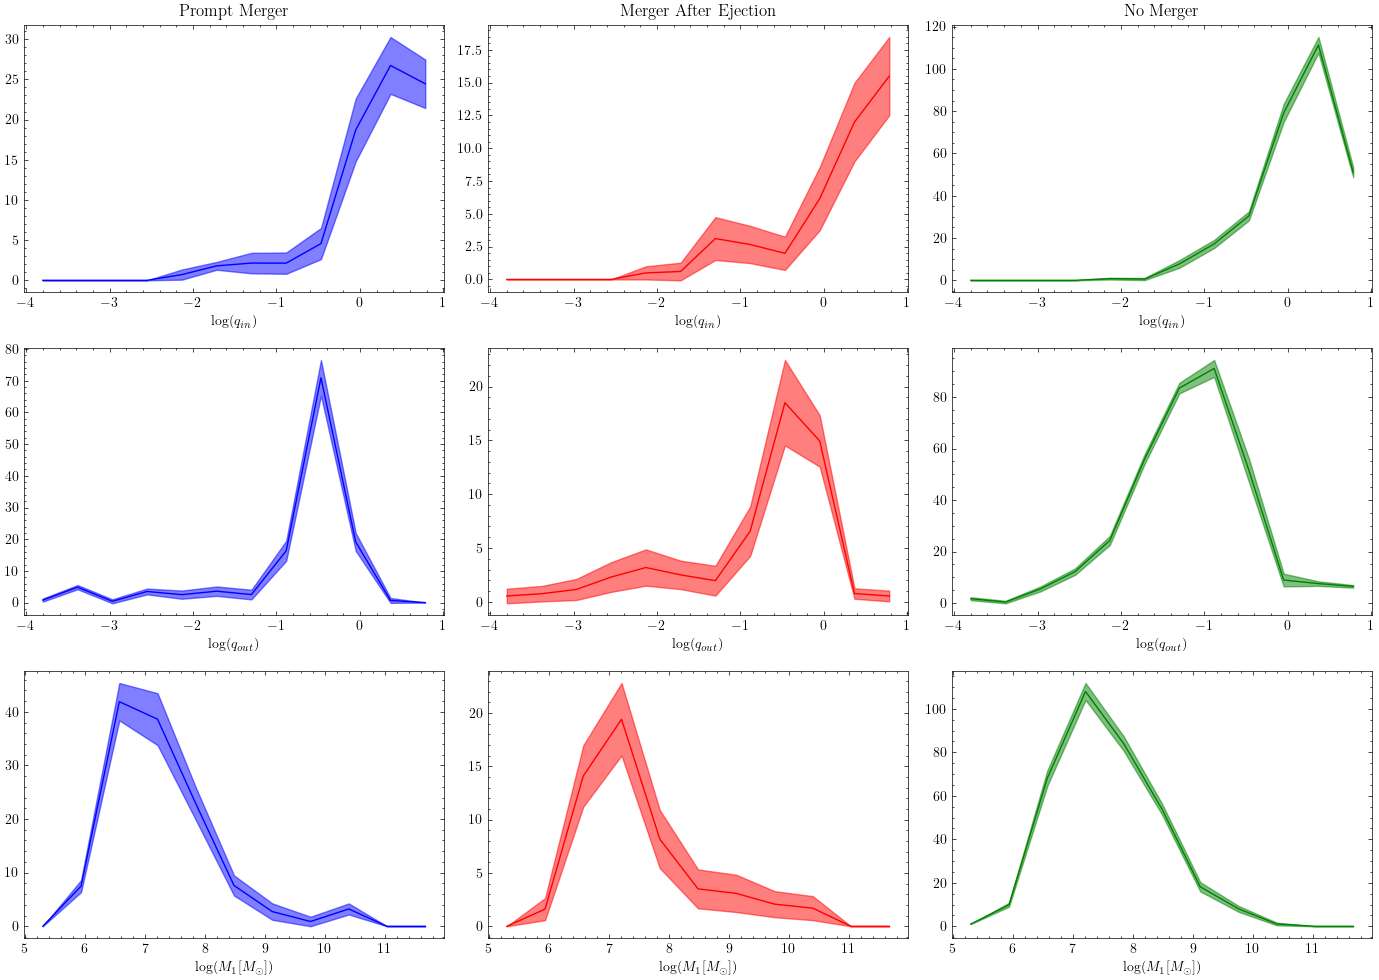

In [58]:
fig,ax = plt.subplots(3,3,figsize=(14,10))

ax[0,0].plot(qin_x,qin_Tr_mu,color="blue",linestyle="-")
ax[0,0].fill_between(qin_x,qin_Tr_mu - qin_Tr_sigma,qin_Tr_mu + qin_Tr_sigma,color="blue",alpha=0.5)
ax[0,0].set_title("Prompt Merger")
ax[0,0].set_xlabel("$\log(q_{in})$")
ax[0,1].plot(qin_x,qin_Tr_ej_mu,color="red",linestyle="-")
ax[0,1].fill_between(qin_x,qin_Tr_ej_mu - qin_Tr_ej_sigma,qin_Tr_ej_mu + qin_Tr_ej_sigma,color="red",alpha=0.5)
ax[0,1].set_title("Merger After Ejection")
ax[0,1].set_xlabel("$\log(q_{in})$")
ax[0,2].plot(qin_x,qin_Tr_no_mu,color="green",linestyle="-")
ax[0,2].fill_between(qin_x,qin_Tr_no_mu - qin_Tr_no_sigma,qin_Tr_no_mu + qin_Tr_no_sigma,color="green",alpha=0.5)
ax[0,2].set_title("No Merger")
ax[0,2].set_xlabel("$\log(q_{in})$")


ax[1,0].plot(qout_x,qout_Tr_mu,color="blue",linestyle="-")
ax[1,0].fill_between(qout_x,qout_Tr_mu - qout_Tr_sigma,qout_Tr_mu + qout_Tr_sigma,color="blue",alpha=0.5)
ax[1,0].set_xlabel("$\log(q_{out})$")
ax[1,1].plot(qout_x,qout_Tr_ej_mu,color="red",linestyle="-")
ax[1,1].fill_between(qout_x,qout_Tr_ej_mu - qout_Tr_ej_sigma,qout_Tr_ej_mu + qout_Tr_ej_sigma,color="red",alpha=0.5)
ax[1,1].set_xlabel("$\log(q_{out})$")
ax[1,2].plot(qout_x,qout_Tr_no_mu,color="green",linestyle="-")
ax[1,2].fill_between(qout_x,qout_Tr_no_mu - qout_Tr_no_sigma,qout_Tr_no_mu + qout_Tr_no_sigma,color="green",alpha=0.5)
ax[1,2].set_xlabel("$\log(q_{out})$")

ax[2,0].plot(M1_x,M1_Tr_mu,color="blue",linestyle="-")
ax[2,0].fill_between(M1_x,M1_Tr_mu - M1_Tr_sigma,M1_Tr_mu + M1_Tr_sigma,color="blue",alpha=0.5)
ax[2,0].set_xlabel("$\log(M_1[M_\odot])$")
ax[2,1].plot(M1_x,M1_Tr_ej_mu,color="red",linestyle="-")
ax[2,1].fill_between(M1_x,M1_Tr_ej_mu - M1_Tr_ej_sigma,M1_Tr_ej_mu + M1_Tr_ej_sigma,color="red",alpha=0.5)
ax[2,1].set_xlabel("$\log(M_1[M_\odot])$")
ax[2,2].plot(M1_x,M1_Tr_no_mu,color="green",linestyle="-")
ax[2,2].fill_between(M1_x,M1_Tr_no_mu - M1_Tr_no_sigma,M1_Tr_no_mu + M1_Tr_no_sigma,color="green",alpha=0.5)
ax[2,2].set_xlabel("$\log(M_1[M_\odot])$")

fig.tight_layout()
plt.savefig("Figures/Triple-outcome-parameter-dist.pdf")

In [62]:
M1_12_array = np.array(M1_12_array)
M1_12_mu = np.mean(M1_12_array,axis = 0)
M1_12_sigma = np.std(M1_12_array,axis = 0)

M1_13_array = np.array(M1_13_array)
M1_13_mu = np.mean(M1_13_array,axis = 0)
M1_13_sigma = np.std(M1_13_array,axis = 0)

M1_12_array = np.array(M1_23_array)
M1_23_mu = np.mean(M1_23_array,axis = 0)
M1_23_sigma = np.std(M1_23_array,axis = 0)

In [63]:
qin_12_array = np.array(qin_12_array)
qin_12_mu = np.mean(qin_12_array,axis=0)
qin_12_sigma = np.std(qin_12_array,axis=0)

qin_13_array = np.array(qin_13_array)
qin_13_mu = np.mean(qin_13_array,axis=0)
qin_13_sigma = np.std(qin_13_array,axis=0)

qin_23_array = np.array(qin_23_array)
qin_23_mu = np.mean(qin_23_array,axis=0)
qin_23_sigma = np.std(qin_23_array,axis=0)

In [64]:
qout_12_array = np.array(qout_12_array)
qout_12_mu = np.mean(qout_12_array,axis=0)
qout_12_sigma = np.std(qout_12_array,axis=0)

qout_13_array = np.array(qout_13_array)
qout_13_mu = np.mean(qout_13_array,axis=0)
qout_13_sigma = np.std(qout_13_array,axis=0)

qout_23_array = np.array(qout_23_array)
qout_23_mu = np.mean(qout_23_array,axis=0)
qout_23_sigma = np.std(qout_23_array,axis=0)

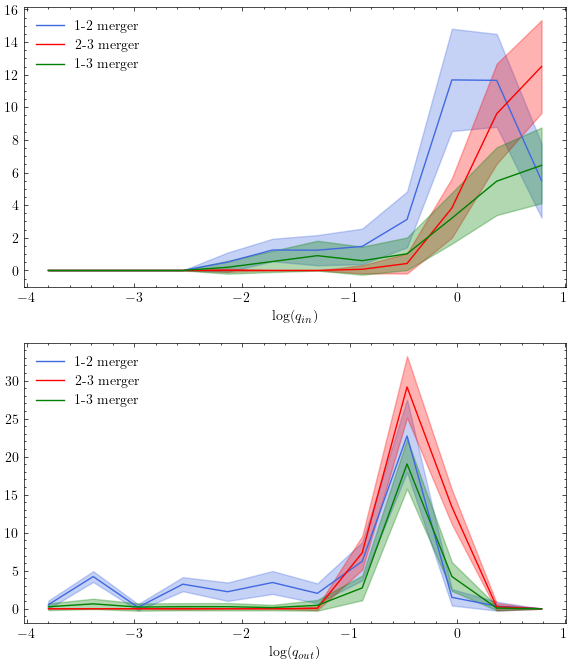

In [65]:
fig,ax = plt.subplots(2,1,figsize=(7,8))
ax[0].plot(qin_p,qin_12_mu,"royalblue",label="1-2 merger")
ax[0].fill_between(qin_p,qin_12_mu-qin_12_sigma,qin_12_mu+qin_12_sigma,color="royalblue",alpha=0.3)
ax[0].plot(qin_p,qin_23_mu,"red",label="2-3 merger")
ax[0].fill_between(qin_p,qin_23_mu-qin_23_sigma,qin_23_mu+qin_23_sigma,color="red",alpha=0.3)
ax[0].plot(qin_p,qin_13_mu,"green",label="1-3 merger")
ax[0].fill_between(qin_p,qin_13_mu-qin_13_sigma,qin_13_mu+qin_13_sigma,color="green",alpha=0.3)
ax[0].legend(loc="upper left")
ax[0].set_xlabel("$\log (q_{in})$")


ax[1].plot(qout_p,qout_12_mu,"royalblue",label="1-2 merger")
ax[1].fill_between(qout_p,qout_12_mu-qout_12_sigma,qout_12_mu+qout_12_sigma,color="royalblue",alpha=0.3)
ax[1].plot(qout_p,qout_23_mu,"red",label="2-3 merger")
ax[1].fill_between(qout_p,qout_23_mu-qout_23_sigma,qout_23_mu+qout_23_sigma,color="red",alpha=0.3)
ax[1].plot(qout_p,qout_13_mu,"green",label="1-3 merger")
ax[1].fill_between(qout_p,qout_13_mu-qout_13_sigma,qout_13_mu+qout_13_sigma,color="green",alpha=0.3)
ax[1].legend(loc="upper left")
ax[1].set_xlabel("$\log (q_{out})$")
plt.savefig("Figures/prompt-merger-wqin-qout.pdf")

<Figure size 350x262.5 with 0 Axes>

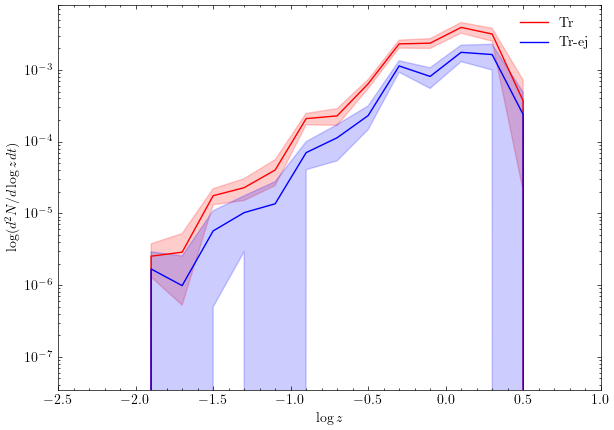

<Figure size 350x262.5 with 0 Axes>

In [67]:
plt.figure(figsize=(7,5))

plt.plot(lgz,np.mean(d2Ndlogzdt_Tr_array,axis=0),color="red",label="Tr")
plt.fill_between(lgz,np.mean(d2Ndlogzdt_Tr_array,axis=0)-np.std(d2Ndlogzdt_Tr_array,axis=0),np.mean(d2Ndlogzdt_Tr_array,axis=0)+np.std(d2Ndlogzdt_Tr_array,axis=0),color="red",alpha=0.2)


plt.plot(lgz,np.mean(d2Ndlogzdt_Tr_ej_array,axis=0),color="blue",label="Tr-ej")
plt.fill_between(lgz,np.mean(d2Ndlogzdt_Tr_ej_array,axis=0)-np.std(d2Ndlogzdt_Tr_ej_array,axis=0),np.mean(d2Ndlogzdt_Tr_ej_array,axis=0)+np.std(d2Ndlogzdt_Tr_ej_array,axis=0),color="blue",alpha=0.2)

plt.xlim(-2.5,1)
plt.xlabel("$\log z$")
plt.ylabel("$\log (d^2 N / d \log z dt)$")
plt.yscale("log")
plt.legend()
plt.figure("Figures/Merger-rate-Tr-Tr-ej.pdf")